# Linear Regression Assignment

In [1]:
#Surpass Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing the data set
df=pd.read_csv("C:\\Users\\HP\\Documents\\Upgrad\\Machine Learning\\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Inspecting the data

In [4]:
# Check the number of rows and columns in the dataframe
df.shape

(730, 16)

In [5]:
# Check the column-wise info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Get a summary of the dataframe using 'describe()'

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Preparation
- In the data set the categorical variables are season, mnth(month), weekday and weatheralt
- Continuous variables are temp, atemp,hum and windspeed

In [7]:
# Dropping ‘instant’, ‘dteday’, ‘casual’ and ‘registered’ variables
df=df.drop(['instant','dteday','casual','registered'], axis=1)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Converting all categorical variables to object datatype
- The reson for converting to object type is that for creating dummies pd.get_dummies takes into consideration only object datatype columns 

In [8]:
convert_season={'season':{1:'spring',2:'summer',3:'fall',4:'winter'}}
df.replace(convert_season,inplace=True)
df.season.astype(str)

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [9]:
convert_weathersit={'weathersit':{1:'Clear',2:'Mist',3:'Light Snow and Rain',4:'Heavy Rain and Snow'}}
df.replace(convert_weathersit,inplace=True)
df.weathersit.astype(str)

0       Mist
1       Mist
2      Clear
3      Clear
4      Clear
       ...  
725     Mist
726     Mist
727     Mist
728    Clear
729     Mist
Name: weathersit, Length: 730, dtype: object

In [10]:
convert_weekday={'weekday':{1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'}}
df.replace(convert_weekday,inplace=True)
df.weekday.astype(str)

0       Saturday
1         Sunday
2         Monday
3        Tuesday
4      Wednesday
         ...    
725     Thursday
726       Friday
727     Saturday
728       Sunday
729       Monday
Name: weekday, Length: 730, dtype: object

In [11]:
convert_month={'mnth':{1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}}
df.replace(convert_month,inplace=True)
df.mnth.astype(str)

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

# Visualizing numeric variables using pairplot

In [12]:
#dropping atemp variable as there is high correlation between atemp and temp. Retaining temp variables in the analysis
df=df.drop(['atemp'], axis=1)

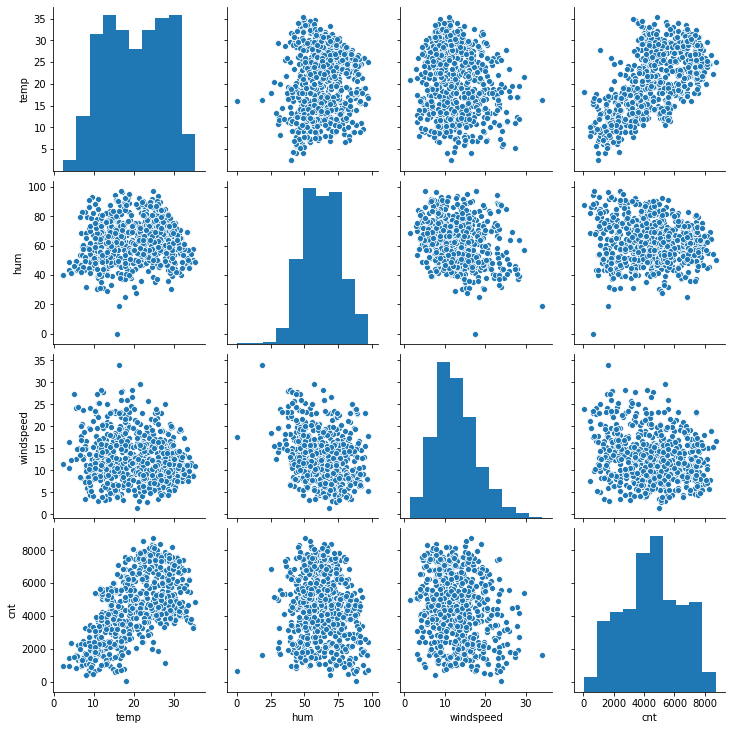

In [13]:
#Using pairplot for analysing all numeric variables in df
numlist=['temp','hum','windspeed','cnt']
sns.pairplot(df[numlist])
plt.show()

We see that there is positive correlation between temp and cnt. The warmer the temp more bike are rented.
For humidity and windspeed we see there is negative correlation between these two with cnt. We can conclude stating
that too much wind and humidity doesnt help in bink rental.

In [14]:
df[numlist].corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


# Visualizing categorical variables using box plot

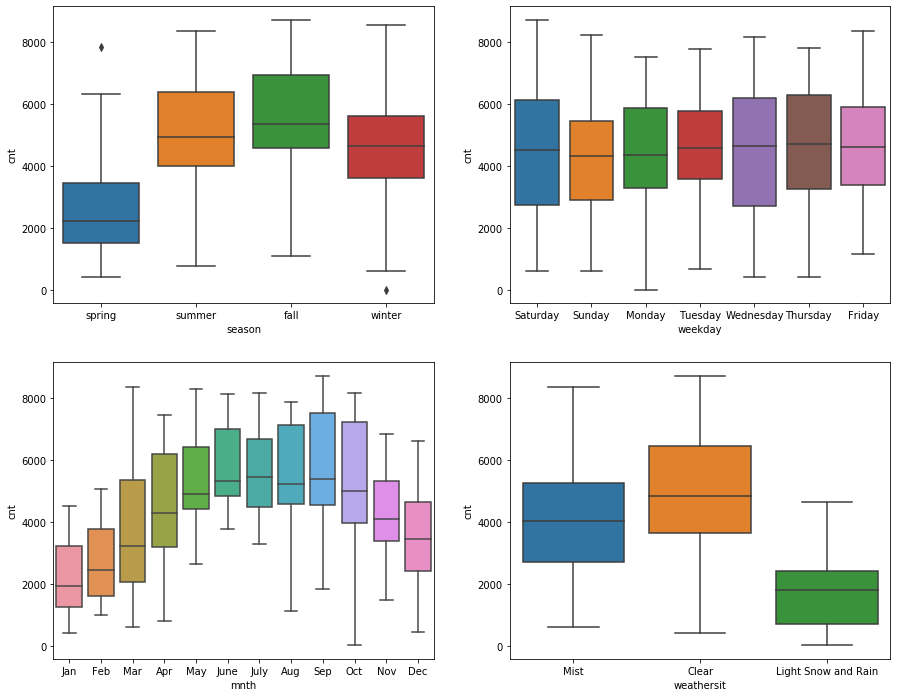

In [15]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

From the above figure we see that people tend to rent bikes when the weather is clear 
and the season "fall" is the top season to rent bike.

# Data Preparation

In [16]:
# Get the dummy variables for the all categorical variables season,month,weekday and weathersit
season_status = pd.get_dummies(df['season'],drop_first=True)
month_status = pd.get_dummies(df['mnth'],drop_first=True)
weekday_status = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_status = pd.get_dummies(df['weathersit'],drop_first=True)

In [17]:
month_status.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [18]:
season_status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
weekday_status.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [20]:
weathersit_status.head()

,Light Snow and Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [21]:
# Add the results to the original bike dataframe

df = pd.concat([df, season_status,month_status,weekday_status,weathersit_status], axis = 1)
# looking into the new data set
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Drop 'season',weekday,mnth and wethersit columns as we have created the dummies for it

df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting the Data into Training and Testing Sets
- The first basic step for regression is performing a train-test split.

In [85]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [86]:
df_train.shape

(510, 29)

### Performing scaling

In Linear Regression, scaling doesn't impact your model. 
However it is extremely important to rescale the variables so that they have a comparable scale. 
If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model 
might be very large or very small as compared to the other coefficients. 
This might become very annoying at the time of model evaluation. 
So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 


I am using MinMax Scaling

In [87]:
from sklearn.preprocessing import MinMaxScaler
#Instantiate an object
scaler = MinMaxScaler()

In [88]:
# Apply scaler() to all the columns except for binary variables and dummy variables
# Here numlist is the list of all numeric variables which we had used earlier for plotting pair plot

df_train[numlist] = scaler.fit_transform(df_train[numlist])

In [89]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [90]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [91]:
y_train = df_train.pop('cnt') #Cnt column
X_train = df_train #all columns except cnt

# Data Modeling
- Creating Linear Regression model with mixed approach using first RFE and then p value and VIF to reduce the number of features

### RFE
Recursive feature elimination

In [92]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Light Snow and Rain', True, 1),
 ('Mist', True, 1)]

### Building the model using RFE method

In [95]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'July', 'Sep', 'Saturday',
       'Light Snow and Rain', 'Mist'],
      dtype='object')

In [96]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [97]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [98]:
# Running the first linear model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   

In [99]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        20:06:02   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2510    

### Looking into VIF as p value for all the selected features seems fine

### Calculating VIF

In [100]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Jan', 'July', 'Sep', 'Saturday',
       'Light Snow and Rain', 'Mist'],
      dtype='object')

In [101]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [102]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,Mist,2.29
0,yr,2.09
12,Saturday,1.98


### Removing hum variables as it has high VIF and rebuilding the model

In [103]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [104]:
X_train_lm = sm.add_constant(X_train_new)

In [105]:
# Running the second linear model
lm_2 = sm.OLS(y_train,X_train_lm).fit()   
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.33e-189
Time:                        20:06:07   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1737    

In [106]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,Saturday,1.97
8,Jan,1.62
9,July,1.59


Dropping temp variable as it has high VIF

In [107]:
X_train_new = X_train_new.drop(['temp'], axis=1)
X_train_lm = sm.add_constant(X_train_new)

In [108]:
# Running the third linear model
lm_3 = sm.OLS(y_train,X_train_lm).fit()   
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.04e-154
Time:                        20:06:10   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5448    

In [109]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,spring,2.97
5,summer,2.27
6,winter,1.99
0,yr,1.91
10,Saturday,1.69
7,Jan,1.60
12,Mist,1.56
8,July,1.30


Removing "july" variable as it has high p value

In [110]:
X_train_new = X_train_new.drop(['July'], axis=1)
X_train_lm = sm.add_constant(X_train_new)

In [111]:
# Running the fourth linear model
lm_4 = sm.OLS(y_train,X_train_lm).fit()   
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.62e-155
Time:                        20:06:12   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5409    

In [112]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,spring,2.68
5,summer,2.00
0,yr,1.89
6,winter,1.78
9,Saturday,1.62
7,Jan,1.60
11,Mist,1.56
8,Sep,1.20


Dropping holiday variable as it has high p value

In [113]:
X_train_new = X_train_new.drop(['holiday'], axis=1)
X_train_lm = sm.add_constant(X_train_new)

In [114]:
# Running the fifth linear model
lm_5 = sm.OLS(y_train,X_train_lm).fit()   
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.30e-155
Time:                        20:06:14   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5334    

In [115]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,spring,2.65
4,summer,1.99
0,yr,1.88
5,winter,1.73
6,Jan,1.60
8,Saturday,1.56
10,Mist,1.56
7,Sep,1.18


Based on the above model we have satisfied the considtion that the features should have p<0.05 and VIF<5.

Now I am adding back temp variable as initially when we dropped it there was drastic drop in R2 and also as it has positive correaltion with the target varibale

In [116]:
#Adding temp variable
X_train_new['temp']=df_train['temp']


In [117]:
X_train_new.columns

Index(['yr', 'workingday', 'windspeed', 'spring', 'summer', 'winter', 'Jan',
       'Sep', 'Saturday', 'Light Snow and Rain', 'Mist', 'temp'],
      dtype='object')

In [118]:
X_train_lm = sm.add_constant(X_train_new)

In [119]:
# Running the sixth linear model
lm_6 = sm.OLS(y_train,X_train_lm).fit()   
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.16e-189
Time:                        20:06:17   Log-Likelihood:                 505.62
No. Observations:                 510   AIC:                            -985.2
Df Residuals:                     497   BIC:                            -930.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1580    

In [120]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.53
1,workingday,4.68
2,windspeed,4.65
3,spring,2.87
0,yr,2.07
4,summer,1.99
8,Saturday,1.84
5,winter,1.77
6,Jan,1.61
10,Mist,1.57


- As we can see the R2 has increased from 0.779 to 0.840 after inclusion of temp.

- Also lets try dropping other variables and see if that reduces the VIF of temp variable


In [121]:
#Dropping the Jan variable
X_train_new = X_train_new.drop(['Jan'], axis=1)

In [122]:
X_train_lm = sm.add_constant(X_train_new)
# Running the seventh linear model
lm_7 = sm.OLS(y_train,X_train_lm).fit()   
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.86e-189
Time:                        20:06:23   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1405    

In [123]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.48
1,workingday,4.65
2,windspeed,4.63
3,spring,2.30
0,yr,2.07
4,summer,1.99
7,Saturday,1.83
5,winter,1.77
9,Mist,1.56
6,Sep,1.23


In [124]:
#Dropping Spring variable
X_train_new=X_train_new.drop(['spring'],axis=1)

In [125]:
X_train_lm = sm.add_constant(X_train_new)
# Running the eight linear model
lm_8 = sm.OLS(y_train,X_train_lm).fit()   
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        20:06:26   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0753    

In [126]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.76
1,workingday,4.04
2,windspeed,3.43
0,yr,2.02
6,Saturday,1.69
3,summer,1.57
8,Mist,1.53
4,winter,1.40
5,Sep,1.20
7,Light Snow and Rain,1.08


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [127]:
y_train_pred = lm_8.predict(X_train_lm)

In [128]:
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'summer', 'winter', 'Sep',
       'Saturday', 'Light Snow and Rain', 'Mist', 'temp'],
      dtype='object')

Text(0.5, 0, 'Errors')

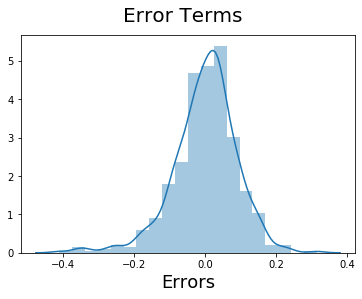

In [129]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

 The graph above shows that the errors are normally distribution with centered at Zero

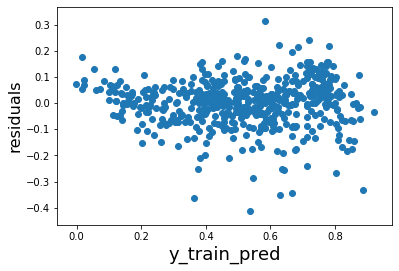

In [130]:
#checking if errors have constant variance 
res=y_train - y_train_pred
plt.scatter(y_train_pred,res)
plt.xlabel('y_train_pred', fontsize = 18)                          # X-label
plt.ylabel('residuals', fontsize = 16) 
plt.show()

 The above graph shows there is no specific patters which indicates that errors have constant variance and they are independent to each other

In [131]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8357769866151917

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. eight model.

In [132]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Applying the scaling on the test sets

In [133]:
numlist=['temp','hum','windspeed','cnt']
df_test[numlist] = scaler.transform(df_test[numlist])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [134]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [135]:
y_test = df_test.pop('cnt') #Cnt column
X_test = df_test #all columns except cnt

In [77]:
X_train
# Creating X_test_new dataframe by dropping variables from X_test
X_test_lm = X_test[X_train_lm.columns]
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_lm)
X_test_lm.shape

KeyError: "['const'] not in index"

In [75]:
X_test_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow and Rain,Mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm

X_test_lm = X_test_lm[X_train_lm.columns]
X_test_lm.head()

,const,yr,workingday,windspeed,summer,winter,Sep,Saturday,Light Snow and Rain,Mist,temp
184,1.0,0,0,0.084219,0,0,0,0,0,1,0.831783
535,1.0,1,1,0.153728,1,0,0,0,0,0,0.901354
299,1.0,0,1,0.334206,0,1,0,0,0,1,0.511964
221,1.0,0,1,0.339570,0,0,0,0,0,0,0.881625
152,1.0,0,1,0.537414,1,0,0,0,0,0,0.817246


In [77]:
X_test_lm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'summer', 'winter', 'Sep',
       'Saturday', 'Light Snow and Rain', 'Mist', 'temp'],
      dtype='object')

In [78]:
# Making predictions using the eight model

y_test_pred = lm_8.predict(X_test_lm)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred')

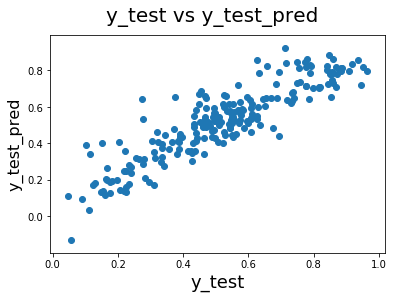

In [79]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

In [80]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7955844377237249


The equation of our best fitted line is which is our eight model in this assignment is as below:

$ cnt = 0.2331  \times  yr + 0.5499  \times  temp + 0.0563  \times  workingday + 0.0874 \times summer + 0.1318 \times winter + 0.0972 \times Sep + 0.0677 \times Saturday - 0.1552 \times windspeed - 0.2880 \times Light Snow and Rain - 0.0813 \times Mist $


Overall the model we have is a descent model. The top 3 features which contribute significantly towards demand in bike rentals are temp,Light Snow and Rain, and year(yr).

Recommendations:

1. Build a non linear model
2. Also check if adding or removing any other feature will increase the R2

In [81]:
#To check what is the R2 when fitting y_test against X_test_lm
ltm_8 = sm.OLS(y_test,X_test_lm).fit()   
print(ltm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     86.87
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.26e-68
Time:                        19:50:58   Log-Likelihood:                 202.95
No. Observations:                 219   AIC:                            -383.9
Df Residuals:                     208   BIC:                            -346.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0427    

- For the train set when fitting the model against y_train and X_train_lm, R2 is 83.6% and Adj R2 is 83.2%.When testing the R2 against y_train and y_train_pred is 83.6%
- For the test set as seen above when fitting against y_test and X_test_lm, R2 is 80.7% and Adjusted R2 is 79.8%.When testing the R2 against y_test and y_test_pred is 79.5%